In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [4]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.0,45,27.0,31.0,0.0
1,85,64.0,59,NaN,NaN,NaN
2,86,54.0,33,16.0,54.0,0.0
3,91,78.0,34,24.0,36.0,0.0
4,98,55.0,13,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91,54.0,25,22.0,35.0,4.0
341,89,48.0,32,22.0,14.0,4.0
342,85,52.0,22,NaN,NaN,NaN
343,95,93.0,21,27.0,47.0,6.0


In [5]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	11
int64		column 3	0
float64		column 4	67
float64		column 5	67
float64		column 6	56


In [6]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,345.000000,334.000000,345.000000,278.000000,278.000000,289.000000
mean,90.159420,69.763473,30.405797,24.219424,37.830935,3.503460
std,4.448096,18.054498,19.512309,9.429889,40.348887,3.339056
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,22.000000,23.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,44.000000,6.000000
max,103.000000,134.000000,155.000000,78.000000,297.000000,20.000000


<AxesSubplot:>

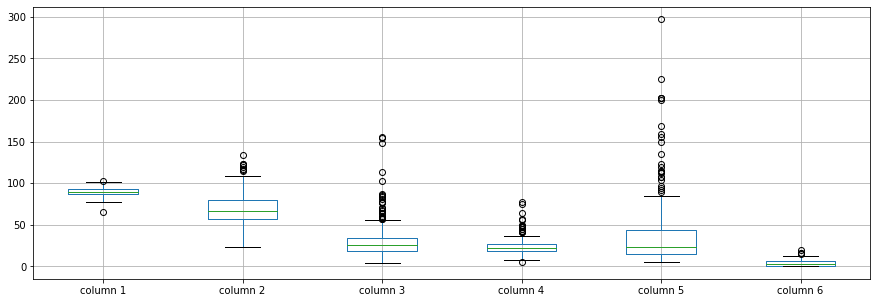

In [7]:
df.boxplot(return_type='axes', figsize=(15,5))

In [8]:
df.mean()

column 1    90.159420
column 2    69.763473
column 3    30.405797
column 4    24.219424
column 5    37.830935
column 6     3.503460
dtype: float64

In [9]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.045438,0.147695,0.255144,0.258430,0.333728
column 2,0.045438,1.000000,0.071504,0.208469,0.166289,0.117363
column 3,0.147695,0.071504,1.000000,0.703892,0.489828,0.225830
column 4,0.255144,0.208469,0.703892,1.000000,0.547935,0.343561
column 5,0.258430,0.166289,0.489828,0.547935,1.000000,0.296056
column 6,0.333728,0.117363,0.225830,0.343561,0.296056,1.000000


In [10]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [11]:
imputer = md.Midas(layer_structure = [6,6+20,6+20+20,6+20+20+20,6+20+20+20+20,6+20+20+20,6+20+20,6+20,6], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=20)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 260.15762765066967
Epoch: 1 , loss: 258.1152830578032
Epoch: 2 , loss: 261.11338297526044
Epoch: 3 , loss: 261.4960174560547
Epoch: 4 , loss: 260.9626682826451
Epoch: 5 , loss: 260.6837456112816
Epoch: 6 , loss: 262.7092561267671
Epoch: 7 , loss: 260.22108168829055
Epoch: 8 , loss: 261.22468130929127
Epoch: 9 , loss: 261.8824935186477
Epoch: 10 , loss: 259.97078668503536
Epoch: 11 , loss: 260.5241931733631
Epoch: 12 , loss: 261.9568684895833
Epoch: 13 , loss: 261.7594241187686
Epoch: 14 , loss: 261.89449201311385
Epoch: 15 , loss: 260.52934192475817
Epoch: 16 , loss: 262.21578034900483
Epoch: 17 , loss: 262.4351566859654
Epoch: 18 , loss: 259.819344656808
Epoch: 19 , loss: 262.06321934291293
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0,0.0,0,0.000000,0.000000,0.000000
1,0,0.0,0,-31.982796,-22.971474,0.022169
2,0,0.0,0,0.000000,0.000000,0.000000
3,0,0.0,0,0.000000,0.000000,0.000000
4,0,0.0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
340,0,0.0,0,0.000000,0.000000,0.000000
341,0,0.0,0,0.000000,0.000000,0.000000
342,0,0.0,0,-22.981462,-33.970647,-3.969210
343,0,0.0,0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

557.0862328961118

In [19]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [21]:
NRMS=numerator/denominator
NRMS


0.2210868377919883

In [22]:
new_df.iloc[66,:]

column 1    86.000000
column 2     0.054998
column 3    20.000000
column 4     0.006766
column 5     0.041586
column 6     2.000000
Name: 66, dtype: float64

In [23]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.0,45,27.000000,31.000000,0.000000
1,85,64.0,59,0.017204,0.028526,0.022169
2,86,54.0,33,16.000000,54.000000,0.000000
3,91,78.0,34,24.000000,36.000000,0.000000
4,98,55.0,13,17.000000,17.000000,0.000000
...,...,...,...,...,...,...
340,91,54.0,25,22.000000,35.000000,4.000000
341,89,48.0,32,22.000000,14.000000,4.000000
342,85,52.0,22,0.018538,0.029353,0.030790
343,95,93.0,21,27.000000,47.000000,6.000000


In [24]:
imputations[-1].to_excel("Bupa_AW_10(imp).xlsx", index=False, header=False)